In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import skeletonize

In [2]:
def improved_filter(image, h):
    img_len = len(image)
    img_wid = len(image[0])
    padded_image = np.zeros((img_len + 2,img_wid + 2))
    padded_image[1:-1,1:-1] = image
    d = np.zeros(np.shape(image))
    for i in range(1,img_len+1):
        for j in range(1,img_wid+1):
            d[i-1,j-1] = np.sqrt(np.square(0.5*(padded_image[i+1,j] - padded_image[i-1,j])) + np.square(0.5*(padded_image[i,j+1] - padded_image[i,j-1])))
    w = np.exp(-np.sqrt(d)/(2*h*h))
    padded_w = np.zeros((img_len + 2,img_wid + 2))
    padded_w[1:-1,1:-1] = w
    final_image = np.zeros(np.shape(image))
    for i in range(1,img_len+1):
        for j in range(1,img_wid+1):
            final_image[i-1,j-1] = np.sum(padded_image[i-1:i+2,j-1:j+2]*padded_w[i-1:i+2,j-1:j+2])/np.sum(padded_w[i-1:i+2,j-1:j+2])
    return final_image

In [39]:
def edge_detection(image, T):
    img_len = len(image)
    img_wid = len(image[0])
    padded_image = np.zeros((img_len + 2,img_wid + 2))
    padded_image[1:-1,1:-1] = image
    final_image = np.zeros(np.shape(image))
    
    for i in range(1,img_len-1):
        for j in range(1,img_wid-1):
            if final_image[i,j]!=1:
                if (np.abs(1 - padded_image[i+2,j+1] + padded_image[i,j+1]))<T:
                    final_image[i,j] = 1
                    final_image[i+1,j] = 1
                if (np.abs(1 - padded_image[i,j+1] + padded_image[i+2,j+1]))<T:
                    final_image[i,j] = 1
                    final_image[i-1,j] = 1
                if (np.abs(1 - padded_image[i+1,j+2] + padded_image[i+1,j]))<T:
                    final_image[i,j] = 1
                    final_image[i,j+1] = 1
                if (np.abs(1 - padded_image[i+1,j] + padded_image[i+1,j+2]))<T:
                    final_image[i,j] = 1
                    final_image[i,j-1] = 1
                if (np.abs(1 - padded_image[i+2,j+2] + padded_image[i,j]))<T:
                    final_image[i,j] = 1
                    final_image[i+1,j+1] = 1
                if (np.abs(1 - padded_image[i,j] + padded_image[i+2,j+2]))<T:
                    final_image[i,j] = 1
                    final_image[i-1,j-1] = 1
                if (np.abs(1 - padded_image[i+2,j] + padded_image[i,j+2]))<T:
                    final_image[i,j] = 1
                    final_image[i+1,j-1] = 1
                if (np.abs(1 - padded_image[i,j+2] + padded_image[i+2,j]))<T:
                    final_image[i,j] = 1
                    final_image[i-1,j+1] = 1
                
    return final_image

In [79]:
lena = cv2.imread(r"C:\Users\user\Desktop\lena.tif", 0)/255.

In [86]:
filt = improved_filter(lena,15)
edge = edge_detection(filt,0.96)
thinned = skeletonize(cv2.erode(edge,np.ones((3,3)),iterations = 1))

gray image


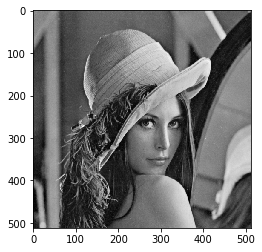

improved filter image


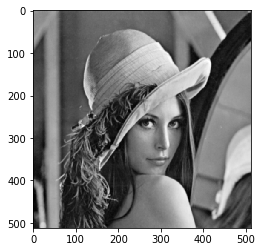

detected edges


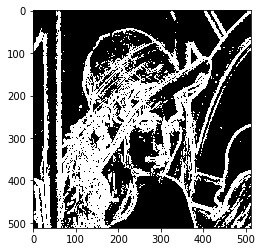

thinned edges


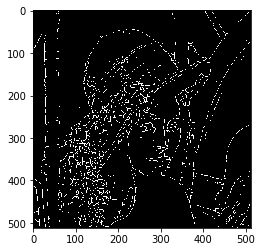

In [87]:
print("gray image")
plt.imshow(lena, cmap = "gray")
plt.show()
print("improved filter image")
plt.imshow(filt,cmap = "gray")
plt.show()
print("detected edges")
plt.imshow(edge,cmap = "gray")
plt.show()
print("thinned edges")
plt.imshow(thinned,cmap = "gray")
plt.show()